In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import random


In [2]:
euro = "data/Euro_6_latest.csv"
euro_df = pd.read_csv(euro, encoding='ANSI')
euro_df

,Manufacturer,Model,Description,Transmission,Manual or Automatic,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),Engine Power (Kw),...,Emissions CO [mg/km],THC Emissions [mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],RDE NOx Urban,RDE NOx Combined,Noise Level dB(A),Date of change,Unnamed: 44
0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,829.0,39.0,20.0,NaN,NaN,NaN,NaN,74.0,09 February 2022,NaN
1,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,829.0,39.0,20.0,NaN,NaN,NaN,NaN,74.0,09 February 2022,NaN
2,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,760.0,52.0,27.0,NaN,NaN,NaN,NaN,73.5,05 October 2020,NaN
3,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,760.0,52.0,27.0,NaN,NaN,NaN,NaN,73.5,05 October 2020,NaN
4,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,760.0,52.0,27.0,NaN,NaN,NaN,NaN,73.5,02 July 2021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6329,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid Inscription Pro,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,...,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13 August 2021,NaN
6330,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,...,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13 August 2021,NaN
6331,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,...,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13 August 2021,NaN
6332,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design Pro,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,...,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13 August 2021,NaN


In [3]:
euro_emissions = euro_df.drop(euro_df.loc[euro_df["Fuel Type"]  == "Electricity"].index)

euro_emissions = euro_emissions.groupby(['Manufacturer', 'Model', 'Description'], as_index=False).mean()
euro_emissions

,Manufacturer,Model,Description,Engine Capacity,Engine Power (PS),Engine Power (Kw),Electric energy consumption Miles/kWh,wh/km,Maximum range (Km),Maximum range (Miles),...,Electric Range City Km,Emissions CO [mg/km],THC Emissions [mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],RDE NOx Urban,RDE NOx Combined,Noise Level dB(A),Unnamed: 44
0,ABARTH,595,1.4 TJET 145bhp,1368.0,145.0,107.0,0.0,NaN,NaN,NaN,...,NaN,829.0,39.0,20.0,NaN,NaN,NaN,NaN,74.0,NaN
1,ABARTH,595,595 1.4 145 BHP,1368.0,145.0,107.0,0.0,NaN,NaN,NaN,...,NaN,760.0,52.0,27.0,NaN,NaN,NaN,NaN,73.5,NaN
2,ABARTH,595,595 1.4 145 BHP,1368.0,145.0,107.0,0.0,NaN,NaN,NaN,...,NaN,760.0,52.0,27.0,NaN,NaN,NaN,NaN,73.5,NaN
3,ABARTH,595,595 1.4 145 BHP Convertible,1368.0,145.0,107.0,0.0,NaN,NaN,NaN,...,NaN,760.0,52.0,27.0,NaN,NaN,NaN,NaN,73.5,NaN
4,ABARTH,595,595 1.4 TJET 145 BHP,1368.0,145.0,107.0,0.0,NaN,NaN,NaN,...,NaN,760.0,52.0,27.0,NaN,NaN,NaN,NaN,73.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid Inscription,1969.0,390.0,288.0,2.4,254.0,50.0,31.0,...,51.0,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,NaN
3599,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid Inscription Expression,1969.0,390.0,288.0,2.4,254.0,50.0,31.0,...,51.0,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,NaN
3600,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid Inscription Pro,1969.0,390.0,288.0,2.4,254.0,50.0,31.0,...,51.0,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,NaN
3601,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design,1969.0,390.0,288.0,2.4,254.0,50.0,31.0,...,51.0,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,NaN


In [4]:
manu_emissions = euro_emissions.groupby(['Manufacturer'], as_index=False).mean().sort_values(by='WLTP CO2')
manu_emissions = manu_emissions[['Manufacturer', 'WLTP CO2']]
manu_emissions

,Manufacturer,WLTP CO2
36,SUZUKI,121.500000
37,TOYOTA,132.070381
16,HYUNDAI,134.907609
15,HONDA,136.570792
18,KIA,137.378819
38,VOLVO,140.786111
31,RENAULT,140.910870
9,DACIA,141.895115
12,FIAT,143.787234
33,SEAT,143.881081


In [13]:
emissions_superstars_pooperstars = []
for n in range (0, 3):
    emissions_superstars_pooperstars.append(manu_emissions.iloc[n]['Manufacturer'])
    
for n in range (len(manu_emissions)-3, len(manu_emissions)):
    emissions_superstars_pooperstars.append(manu_emissions.iloc[n]['Manufacturer'])
    
print(emissions_superstars_pooperstars)

['SUZUKI', 'TOYOTA', 'HYUNDAI', 'BENTLEY MOTORS', 'FERRARI', 'Rolls Royce']


In [14]:
cars = []
euro_emissions_crop = euro_emissions[['Manufacturer', 'Model', 'Description', 'WLTP CO2']]

for manufacturer in emissions_superstars_pooperstars:
    carDF = euro_emissions_crop.loc[((euro_emissions_crop["Manufacturer"] == manufacturer ))]
    carDF.sort_values(by="WLTP CO2", ascending=True)
    cars.append(carDF) 

cars

[     Manufacturer        Model                           Description  WLTP CO2
 3142       SUZUKI       Across       ACROSS 2.5 PHEV SZ5 ALLGRIP CVT     149.0
 3143       SUZUKI        Ignis                 IGNIS 1.2 HYBRID SZ-T     112.0
 3144       SUZUKI        Ignis             IGNIS 1.2 HYBRID SZ-T CVT     122.0
 3145       SUZUKI        Ignis                  IGNIS 1.2 HYBRID SZ3     110.0
 3146       SUZUKI        Ignis                  IGNIS 1.2 HYBRID SZ5     112.0
 3147       SUZUKI        Ignis              IGNIS 1.2 HYBRID SZ5 4x4     121.0
 3148       SUZUKI        Ignis              IGNIS 1.2 HYBRID SZ5 CVT     122.0
 3149       SUZUKI      S-cross               S-CROSS 1.4 HYBRID SZ-T     122.0
 3150       SUZUKI      S-cross          S-CROSS 1.4 HYBRID SZ-T Auto     129.0
 3151       SUZUKI      S-cross                S-CROSS 1.4 HYBRID SZ4     122.0
 3152       SUZUKI      S-cross                S-CROSS 1.4 HYBRID SZ5     122.0
 3153       SUZUKI      S-cross        S

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
#treatments = [capomulin, ramicane, infubinol, ceftamin]


# Create empty list to fill with emissions data (for plotting)
outliers = []
quartile_sum = pd.DataFrame({})
# Calculate the IQR and quantitatively determine if there are any potential outliers. 


for brand in cars:
    #instantiate q0->5
    quartiles = brand["WLTP CO2"].quantile([.25,.5,.75])
    
    lowerq = quartiles[0.25]
    median = quartiles[0.5]    
    upperq = quartiles[0.75]
    lowest = brand["WLTP CO2"].min()
    highest = brand["WLTP CO2"].max()
    
    iqr = upperq-lowerq
    
    #outlier check
    #HANG ON surely this can be done simpler with booleans
    x = brand.loc[brand["WLTP CO2"] < (lowerq - iqr*1.5)]
    if len(x) > 0:
        outliers.append(x["Description"])
        
    x = brand.loc[brand["WLTP CO2"] > (upperq + iqr*1.5)]
    if len(x) >0:
        outliers.append(x["Description"])
        
#investigate a better way to do this...
    cardict = {"brand": brand["Manufacturer"], 
                "Q0": round(lowest, 1), 
                "Q1": round(lowerq, 1), 
                "Q2": round(median, 1), 
                "Q3": round(upperq, 1), 
                "Q4": round(highest, 1)}   
    quartile_sum = quartile_sum.append(cardict, ignore_index=True)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Determine outliers using upper and lower bounds
print(f"there are {len(outliers)} outliers in the data: {outliers}")
    # add subset 
    
# # format nicely    
quartile_sum = quartile_sum.transpose()
# quartile_sum.columns = quartile_sum.iloc[0] 
# quartile_sum = quartile_sum[1:]
quartile_sum



there are 4 outliers in the data: [3337         F SPORT Takumi Pack [Sunroof]
3338              F SPORTPremium Plus Pack
3339    F SPORTPremium Plus Pack [Sunroof]
3352        1.8L PHV Business Edition Plus
3353                        1.8L PHV Excel
3447                     2.5L PHEV Dynamic
3448             2.5L PHEV Dynamic Premium
3449        RAV4 Design 2.5 Plug-in Hybrid
Name: Description, dtype: object, 3303                                    1.6 Turbo
3304                       1.6 Turbo Circuit Pack
3305                   1.6 Turbo Convenience Pack
3306                       2.0L Auto Blue Edition
3307    2.0L Auto Blue Edition + Performance Pack
                          ...                    
3384         Shuttle Medium 2.0 Manual 150 + Navi
3385                   VIP Long 2.0 Automatic 180
3450                                         3.0L
3451                                     3.0L Pro
3452                                          2.0
Name: Description, Length: 65, dtype:

,0,1,2,3,4,5
brand,3142 SUZUKI 3143 SUZUKI 3144 SUZUKI 3...,3172 TOYOTA 3173 TOYOTA 3174 TOYOTA 3...,685 HYUNDAI 686 HYUNDAI 687 HYUNDAI 6...,110 BENTLEY MOTORS 111 BENTLEY MOTORS 11...,412 FERRARI 413 FERRARI 414 FERRARI 4...,2905 Rolls Royce 2906 Rolls Royce 2907 ...
Q0,103.0,0.0,102.0,82.0,255.0,353.0
Q1,112.8,112.0,120.1,281.0,282.8,353.5
Q2,121.5,119.0,124.2,288.0,293.0,362.0
Q3,129.0,132.0,145.2,320.0,366.0,367.8
Q4,149.0,258.0,194.0,340.0,373.0,376.5


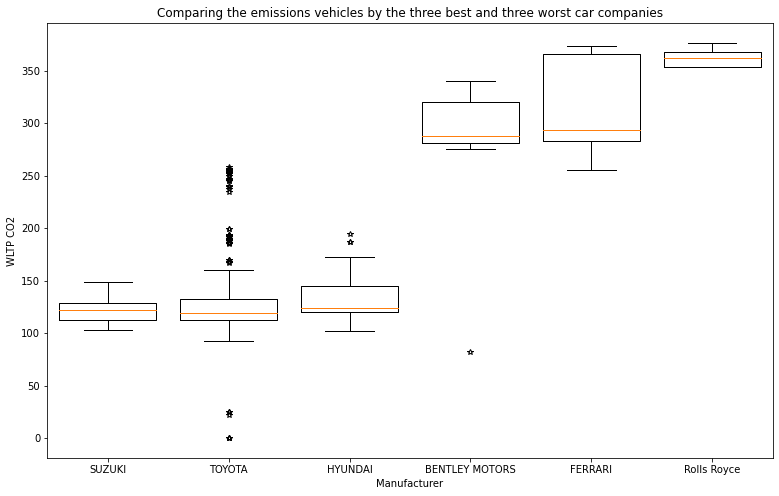

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = []

for car in cars:
    data.append(car["WLTP CO2"])
fig, ax = plt.subplots()
ax.set_title('Comparing the emissions vehicles by the three best and three worst car companies')
ax.boxplot(data, labels = emissions_superstars_pooperstars, sym="*", widths=(0.8))

plt.xlabel("Manufacturer")
plt.ylabel("WLTP CO2")


fig.set_figheight(8)
fig.set_figwidth(13)
plt.show()
